In [242]:
from yfapi import YahooFinanceAPI, Interval
from datetime import datetime, timedelta
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from functools import reduce
from sklearn.datasets import load_iris
import plotly.graph_objects as go
import nbformat


**Install all of these libraries to run correctly,
preferably into a virtual env that you've made.  With
some, especially plotly.graph_objects, you may have to restart your source code editor.**

In [243]:
dh = YahooFinanceAPI(Interval.DAILY)
now = datetime(2022, 7, 13)
then = datetime(2022, 1, 13)


data_dict = dh.get_data_for_tickers(['msft', 'aapl', 'amzn'], then, now)

In [244]:
df = data_dict['msft']
df1 = data_dict['aapl']
df2 = data_dict['amzn']

_Pull in 3 stock tickers data from the YahooFinanceAPI_

In [245]:
df_ = df.rename(columns={'Open':'MSFT_OPEN', 'High':'MSFT_HIGH', 'Low':'MSFT_LOW', 'Close':'MSFT_CLOSE', 'Adj Close':'MSFT_ADJ_CLOSE', 'Volume':'MSFT_VOLUME'})

In [246]:
df_1 = df1.rename(columns= {'Open':'AAPL_OPEN', 'High':'AAPL_HIGH', 'Low':'AAPL_LOW', 'Close':'AAPL_CLOSE', 'Adj Close':'AAPL_ADJ_CLOSE', 'Volume':'AAPL_VOLUME'})

In [247]:
df_2 = df2.rename(columns= {'Open':'AMZN_OPEN', 'High':'AMZN_HIGH', 'Low':'AMZN_LOW', 'Close':'AMZN_CLOSE', 'Adj Close':'AMZN_ADJ_CLOSE', 'Volume':'AMZN_VOLUME'})

_Made each separate stock a dataframe, then renamed the columns for each stock to differentiate which stock data is which_

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       123 non-null    datetime64[ns]
 1   Open       123 non-null    float64       
 2   High       123 non-null    float64       
 3   Low        123 non-null    float64       
 4   Close      123 non-null    float64       
 5   Adj Close  123 non-null    float64       
 6   Volume     123 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 6.9 KB


In [249]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       123 non-null    datetime64[ns]
 1   Open       123 non-null    float64       
 2   High       123 non-null    float64       
 3   Low        123 non-null    float64       
 4   Close      123 non-null    float64       
 5   Adj Close  123 non-null    float64       
 6   Volume     123 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 6.9 KB


In [250]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       123 non-null    datetime64[ns]
 1   Open       123 non-null    float64       
 2   High       123 non-null    float64       
 3   Low        123 non-null    float64       
 4   Close      123 non-null    float64       
 5   Adj Close  123 non-null    float64       
 6   Volume     123 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 6.9 KB


_See that each dataframe has 123 entries and their datatypes_

In [251]:
df.nunique(axis=1)

0      7
1      7
2      7
3      7
4      7
      ..
118    6
119    6
120    6
121    6
122    6
Length: 123, dtype: int64

In [252]:
df.nunique(axis=0)

Date         123
Open         123
High         123
Low          122
Close        122
Adj Close    122
Volume       123
dtype: int64

_See each unique entry of data per column_

In [253]:
df3= [df_, df_1, df_2]

_Combining all 3 dataframes together_

In [259]:
if type(df3) is list:
    print("list")

list


_So the combination of the 3, returns a list, so I need to merge them together_

In [ ]:
stock = reduce(lambda left,right: pd.merge(left, right, on=['Date'], how='outer'),df3 )

_Merge the 3 dataframes together_

In [ ]:
stock

,Date,MSFT_OPEN,MSFT_HIGH,MSFT_LOW,MSFT_CLOSE,MSFT_ADJ_CLOSE,MSFT_VOLUME,AAPL_OPEN,AAPL_HIGH,AAPL_LOW,AAPL_CLOSE,AAPL_ADJ_CLOSE,AAPL_VOLUME,AMZN_OPEN,AMZN_HIGH,AMZN_LOW,AMZN_CLOSE,AMZN_ADJ_CLOSE,AMZN_VOLUME
0,2022-01-13,320.470001,320.880005,304.000000,304.799988,303.464264,45366000,175.779999,176.619995,171.789993,172.190002,171.718597,84505800,165.250504,166.221497,161.091003,161.214005,161.214005,52188000
1,2022-01-14,304.250000,310.820007,303.750000,310.200012,308.840607,39846400,171.339996,173.779999,171.089996,173.070007,172.596207,80440800,160.149994,162.250000,159.800507,162.138000,162.138000,45974000
2,2022-01-18,304.070007,309.799988,301.739990,302.649994,301.323669,42333200,171.509995,172.539993,169.410004,169.800003,169.335144,90956700,159.104996,159.734497,157.664505,158.917496,158.917496,67292000
3,2022-01-19,306.290009,313.910004,302.700012,303.329987,302.000702,45933900,170.000000,171.080002,165.940002,166.229996,165.774918,94815000,158.761993,159.250000,156.250000,156.298996,156.298996,53242000
4,2022-01-20,309.070007,311.649994,301.140015,301.600006,300.278290,35380700,166.979996,169.679993,164.179993,164.509995,164.059616,91420500,156.766006,158.000000,151.350998,151.667496,151.667496,71974000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-07-06,263.750000,267.989990,262.399994,266.209991,266.209991,23824400,141.350006,144.119995,141.080002,142.919998,142.919998,74064300,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
119,2022-07-07,265.119995,269.059998,265.019989,268.399994,268.399994,20859900,143.289993,146.550003,143.279999,146.350006,146.350006,66253700,113.849998,116.989998,113.489998,116.330002,116.330002,57872300
120,2022-07-08,264.790009,268.100006,263.290009,267.660004,267.660004,19648100,145.259995,147.550003,145.000000,147.039993,147.039993,64493200,114.599998,116.580002,113.690002,115.540001,115.540001,45658200
121,2022-07-11,265.649994,266.529999,262.179993,264.510010,264.510010,19455200,145.669998,146.639999,143.779999,144.869995,144.869995,63141600,114.080002,114.300003,110.870003,111.750000,111.750000,53487600


In [260]:
stock.columns

Index(['Date', 'MSFT_OPEN', 'MSFT_HIGH', 'MSFT_LOW', 'MSFT_CLOSE',
       'MSFT_ADJ_CLOSE', 'MSFT_VOLUME', 'AAPL_OPEN', 'AAPL_HIGH', 'AAPL_LOW',
       'AAPL_CLOSE', 'AAPL_ADJ_CLOSE', 'AAPL_VOLUME', 'AMZN_OPEN', 'AMZN_HIGH',
       'AMZN_LOW', 'AMZN_CLOSE', 'AMZN_ADJ_CLOSE', 'AMZN_VOLUME'],
      dtype='object')

In [ ]:
stock.round(2)

,Date,MSFT_OPEN,MSFT_HIGH,MSFT_LOW,MSFT_CLOSE,MSFT_ADJ_CLOSE,MSFT_VOLUME,AAPL_OPEN,AAPL_HIGH,AAPL_LOW,AAPL_CLOSE,AAPL_ADJ_CLOSE,AAPL_VOLUME,AMZN_OPEN,AMZN_HIGH,AMZN_LOW,AMZN_CLOSE,AMZN_ADJ_CLOSE,AMZN_VOLUME
0,2022-01-13,320.47,320.88,304.00,304.80,303.46,45366000,175.78,176.62,171.79,172.19,171.72,84505800,165.25,166.22,161.09,161.21,161.21,52188000
1,2022-01-14,304.25,310.82,303.75,310.20,308.84,39846400,171.34,173.78,171.09,173.07,172.60,80440800,160.15,162.25,159.80,162.14,162.14,45974000
2,2022-01-18,304.07,309.80,301.74,302.65,301.32,42333200,171.51,172.54,169.41,169.80,169.34,90956700,159.10,159.73,157.66,158.92,158.92,67292000
3,2022-01-19,306.29,313.91,302.70,303.33,302.00,45933900,170.00,171.08,165.94,166.23,165.77,94815000,158.76,159.25,156.25,156.30,156.30,53242000
4,2022-01-20,309.07,311.65,301.14,301.60,300.28,35380700,166.98,169.68,164.18,164.51,164.06,91420500,156.77,158.00,151.35,151.67,151.67,71974000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-07-06,263.75,267.99,262.40,266.21,266.21,23824400,141.35,144.12,141.08,142.92,142.92,74064300,113.21,115.48,112.01,114.33,114.33,66958900
119,2022-07-07,265.12,269.06,265.02,268.40,268.40,20859900,143.29,146.55,143.28,146.35,146.35,66253700,113.85,116.99,113.49,116.33,116.33,57872300
120,2022-07-08,264.79,268.10,263.29,267.66,267.66,19648100,145.26,147.55,145.00,147.04,147.04,64493200,114.60,116.58,113.69,115.54,115.54,45658200
121,2022-07-11,265.65,266.53,262.18,264.51,264.51,19455200,145.67,146.64,143.78,144.87,144.87,63141600,114.08,114.30,110.87,111.75,111.75,53487600


_Make things simpler by reducing everything down to two decimal places_

In [ ]:
aaple = pd.read_csv('AAPL.csv')
micro = pd.read_csv("MSFT.csv")
amazon = pd.read_csv("AMZN.csv")

In [ ]:
aa = aaple.rename(columns={'Open':'AAPL_OPEN', 'High':'AAPL_HIGH', 'Low':'AAPL_LOW', 'Close':'AAPL_CLOSE', 'Adj Close':'AAPL_ADJ_CLOSE', 'Volume':'AAPL_VOLUME'})

In [ ]:
m = micro.rename(columns={'Open':'MSFT_OPEN', 'High':'MSFT_HIGH', 'Low':'MSFT_LOW', 'Close':'MSFT_CLOSE', 'Adj Close':'MSFT_ADJ_CLOSE', 'Volume':'MSFT_VOLUME'})

In [ ]:
am = amazon.rename(columns= {'Open':'AMZN_OPEN', 'High':'AMZN_HIGH', 'Low':'AMZN_LOW', 'Close':'AMZN_CLOSE', 'Adj Close':'AMZN_ADJ_CLOSE', 'Volume':'AMZN_VOLUME'})

In [ ]:
csvs = [m, aa, am]

In [ ]:
stocks2 = reduce(lambda left,right: pd.merge(left, right, on=['Date'], how='outer'), csvs)

In [ ]:
stocks2.round(2)

,Date,MSFT_OPEN,MSFT_HIGH,MSFT_LOW,MSFT_CLOSE,MSFT_ADJ_CLOSE,MSFT_VOLUME,AAPL_OPEN,AAPL_HIGH,AAPL_LOW,AAPL_CLOSE,AAPL_ADJ_CLOSE,AAPL_VOLUME,AMZN_OPEN,AMZN_HIGH,AMZN_LOW,AMZN_CLOSE,AMZN_ADJ_CLOSE,AMZN_VOLUME
0,2022-01-13,320.47,320.88,304.00,304.80,303.46,45366000,175.78,176.62,171.79,172.19,171.72,84505800,165.25,166.22,161.09,161.21,161.21,52188000
1,2022-01-14,304.25,310.82,303.75,310.20,308.84,39846400,171.34,173.78,171.09,173.07,172.60,80440800,160.15,162.25,159.80,162.14,162.14,45974000
2,2022-01-18,304.07,309.80,301.74,302.65,301.32,42333200,171.51,172.54,169.41,169.80,169.34,90956700,159.10,159.73,157.66,158.92,158.92,67292000
3,2022-01-19,306.29,313.91,302.70,303.33,302.00,45933900,170.00,171.08,165.94,166.23,165.77,94815000,158.76,159.25,156.25,156.30,156.30,53242000
4,2022-01-20,309.07,311.65,301.14,301.60,300.28,35380700,166.98,169.68,164.18,164.51,164.06,91420500,156.77,158.00,151.35,151.67,151.67,71974000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-07-06,263.75,267.99,262.40,266.21,266.21,23824400,141.35,144.12,141.08,142.92,142.92,74064300,113.21,115.48,112.01,114.33,114.33,66958900
119,2022-07-07,265.12,269.06,265.02,268.40,268.40,20859900,143.29,146.55,143.28,146.35,146.35,66253700,113.85,116.99,113.49,116.33,116.33,57872300
120,2022-07-08,264.79,268.10,263.29,267.66,267.66,19648100,145.26,147.55,145.00,147.04,147.04,64493200,114.60,116.58,113.69,115.54,115.54,45658200
121,2022-07-11,265.65,266.53,262.18,264.51,264.51,19455200,145.67,146.64,143.78,144.87,144.87,63141600,114.08,114.30,110.87,111.75,111.75,53487600


In [ ]:
stocks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            123 non-null    object 
 1   MSFT_OPEN       123 non-null    float64
 2   MSFT_HIGH       123 non-null    float64
 3   MSFT_LOW        123 non-null    float64
 4   MSFT_CLOSE      123 non-null    float64
 5   MSFT_ADJ_CLOSE  123 non-null    float64
 6   MSFT_VOLUME     123 non-null    int64  
 7   AAPL_OPEN       123 non-null    float64
 8   AAPL_HIGH       123 non-null    float64
 9   AAPL_LOW        123 non-null    float64
 10  AAPL_CLOSE      123 non-null    float64
 11  AAPL_ADJ_CLOSE  123 non-null    float64
 12  AAPL_VOLUME     123 non-null    int64  
 13  AMZN_OPEN       123 non-null    float64
 14  AMZN_HIGH       123 non-null    float64
 15  AMZN_LOW        123 non-null    float64
 16  AMZN_CLOSE      123 non-null    float64
 17  AMZN_ADJ_CLOSE  123 non-null    flo

In [ ]:
stocks2['Date'] = pd.to_datetime(stocks2['Date'])

In [ ]:
stocks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            123 non-null    datetime64[ns]
 1   MSFT_OPEN       123 non-null    float64       
 2   MSFT_HIGH       123 non-null    float64       
 3   MSFT_LOW        123 non-null    float64       
 4   MSFT_CLOSE      123 non-null    float64       
 5   MSFT_ADJ_CLOSE  123 non-null    float64       
 6   MSFT_VOLUME     123 non-null    int64         
 7   AAPL_OPEN       123 non-null    float64       
 8   AAPL_HIGH       123 non-null    float64       
 9   AAPL_LOW        123 non-null    float64       
 10  AAPL_CLOSE      123 non-null    float64       
 11  AAPL_ADJ_CLOSE  123 non-null    float64       
 12  AAPL_VOLUME     123 non-null    int64         
 13  AMZN_OPEN       123 non-null    float64       
 14  AMZN_HIGH       123 non-null    float64       
 15  AMZN_L

In [ ]:
final = pd.concat([stock, stocks2])

In [ ]:
final

,Date,MSFT_OPEN,MSFT_HIGH,MSFT_LOW,MSFT_CLOSE,MSFT_ADJ_CLOSE,MSFT_VOLUME,AAPL_OPEN,AAPL_HIGH,AAPL_LOW,AAPL_CLOSE,AAPL_ADJ_CLOSE,AAPL_VOLUME,AMZN_OPEN,AMZN_HIGH,AMZN_LOW,AMZN_CLOSE,AMZN_ADJ_CLOSE,AMZN_VOLUME
0,2022-01-13,320.470001,320.880005,304.000000,304.799988,303.464264,45366000,175.779999,176.619995,171.789993,172.190002,171.718597,84505800,165.250504,166.221497,161.091003,161.214005,161.214005,52188000
1,2022-01-14,304.250000,310.820007,303.750000,310.200012,308.840607,39846400,171.339996,173.779999,171.089996,173.070007,172.596207,80440800,160.149994,162.250000,159.800507,162.138000,162.138000,45974000
2,2022-01-18,304.070007,309.799988,301.739990,302.649994,301.323669,42333200,171.509995,172.539993,169.410004,169.800003,169.335144,90956700,159.104996,159.734497,157.664505,158.917496,158.917496,67292000
3,2022-01-19,306.290009,313.910004,302.700012,303.329987,302.000702,45933900,170.000000,171.080002,165.940002,166.229996,165.774918,94815000,158.761993,159.250000,156.250000,156.298996,156.298996,53242000
4,2022-01-20,309.070007,311.649994,301.140015,301.600006,300.278290,35380700,166.979996,169.679993,164.179993,164.509995,164.059616,91420500,156.766006,158.000000,151.350998,151.667496,151.667496,71974000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-07-06,263.750000,267.989990,262.399994,266.209991,266.209991,23824400,141.350006,144.119995,141.080002,142.919998,142.919998,74064300,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
119,2022-07-07,265.119995,269.059998,265.019989,268.399994,268.399994,20859900,143.289993,146.550003,143.279999,146.350006,146.350006,66253700,113.849998,116.989998,113.489998,116.330002,116.330002,57872300
120,2022-07-08,264.790009,268.100006,263.290009,267.660004,267.660004,19648100,145.259995,147.550003,145.000000,147.039993,147.039993,64493200,114.599998,116.580002,113.690002,115.540001,115.540001,45658200
121,2022-07-11,265.649994,266.529999,262.179993,264.510010,264.510010,19455200,145.669998,146.639999,143.779999,144.869995,144.869995,63141600,114.080002,114.300003,110.870003,111.750000,111.750000,53487600


In [ ]:
x = final.drop_duplicates()

In [ ]:
x.nunique()
# So they are the same rounded to two dec places
# Drop duplicates

Date              123
MSFT_OPEN         123
MSFT_HIGH         123
MSFT_LOW          122
MSFT_CLOSE        122
MSFT_ADJ_CLOSE    128
MSFT_VOLUME       123
AAPL_OPEN         123
AAPL_HIGH         122
AAPL_LOW          123
AAPL_CLOSE        118
AAPL_ADJ_CLOSE    127
AAPL_VOLUME       123
AMZN_OPEN         121
AMZN_HIGH         123
AMZN_LOW          123
AMZN_CLOSE        123
AMZN_ADJ_CLOSE    123
AMZN_VOLUME       123
dtype: int64

In [ ]:
x['Date'].dtype

dtype('<M8[ns]')

In [ ]:
display(x.Date.nunique())

123

In [ ]:
x.reset_index(inplace=True)

In [ ]:
print(x.Date.to_string())

0     2022-01-13
1     2022-01-14
2     2022-01-18
3     2022-01-19
4     2022-01-20
5     2022-01-21
6     2022-01-24
7     2022-01-25
8     2022-01-26
9     2022-01-27
10    2022-01-28
11    2022-01-31
12    2022-02-01
13    2022-02-02
14    2022-02-03
15    2022-02-04
16    2022-02-07
17    2022-02-08
18    2022-02-09
19    2022-02-10
20    2022-02-11
21    2022-02-14
22    2022-02-15
23    2022-02-16
24    2022-02-17
25    2022-02-18
26    2022-02-22
27    2022-02-23
28    2022-02-24
29    2022-02-25
30    2022-02-28
31    2022-03-01
32    2022-03-02
33    2022-03-03
34    2022-03-04
35    2022-03-07
36    2022-03-08
37    2022-03-09
38    2022-03-10
39    2022-03-11
40    2022-03-14
41    2022-03-15
42    2022-03-16
43    2022-03-17
44    2022-03-18
45    2022-03-21
46    2022-03-22
47    2022-03-23
48    2022-03-24
49    2022-03-25
50    2022-03-28
51    2022-03-29
52    2022-03-30
53    2022-03-31
54    2022-04-01
55    2022-04-04
56    2022-04-05
57    2022-04-06
58    2022-04-

<AxesSubplot:>

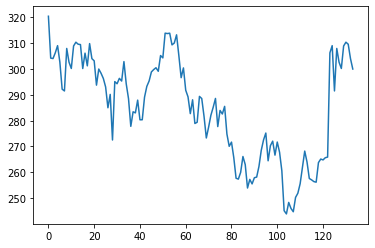

In [ ]:
x['MSFT_OPEN'].plot()

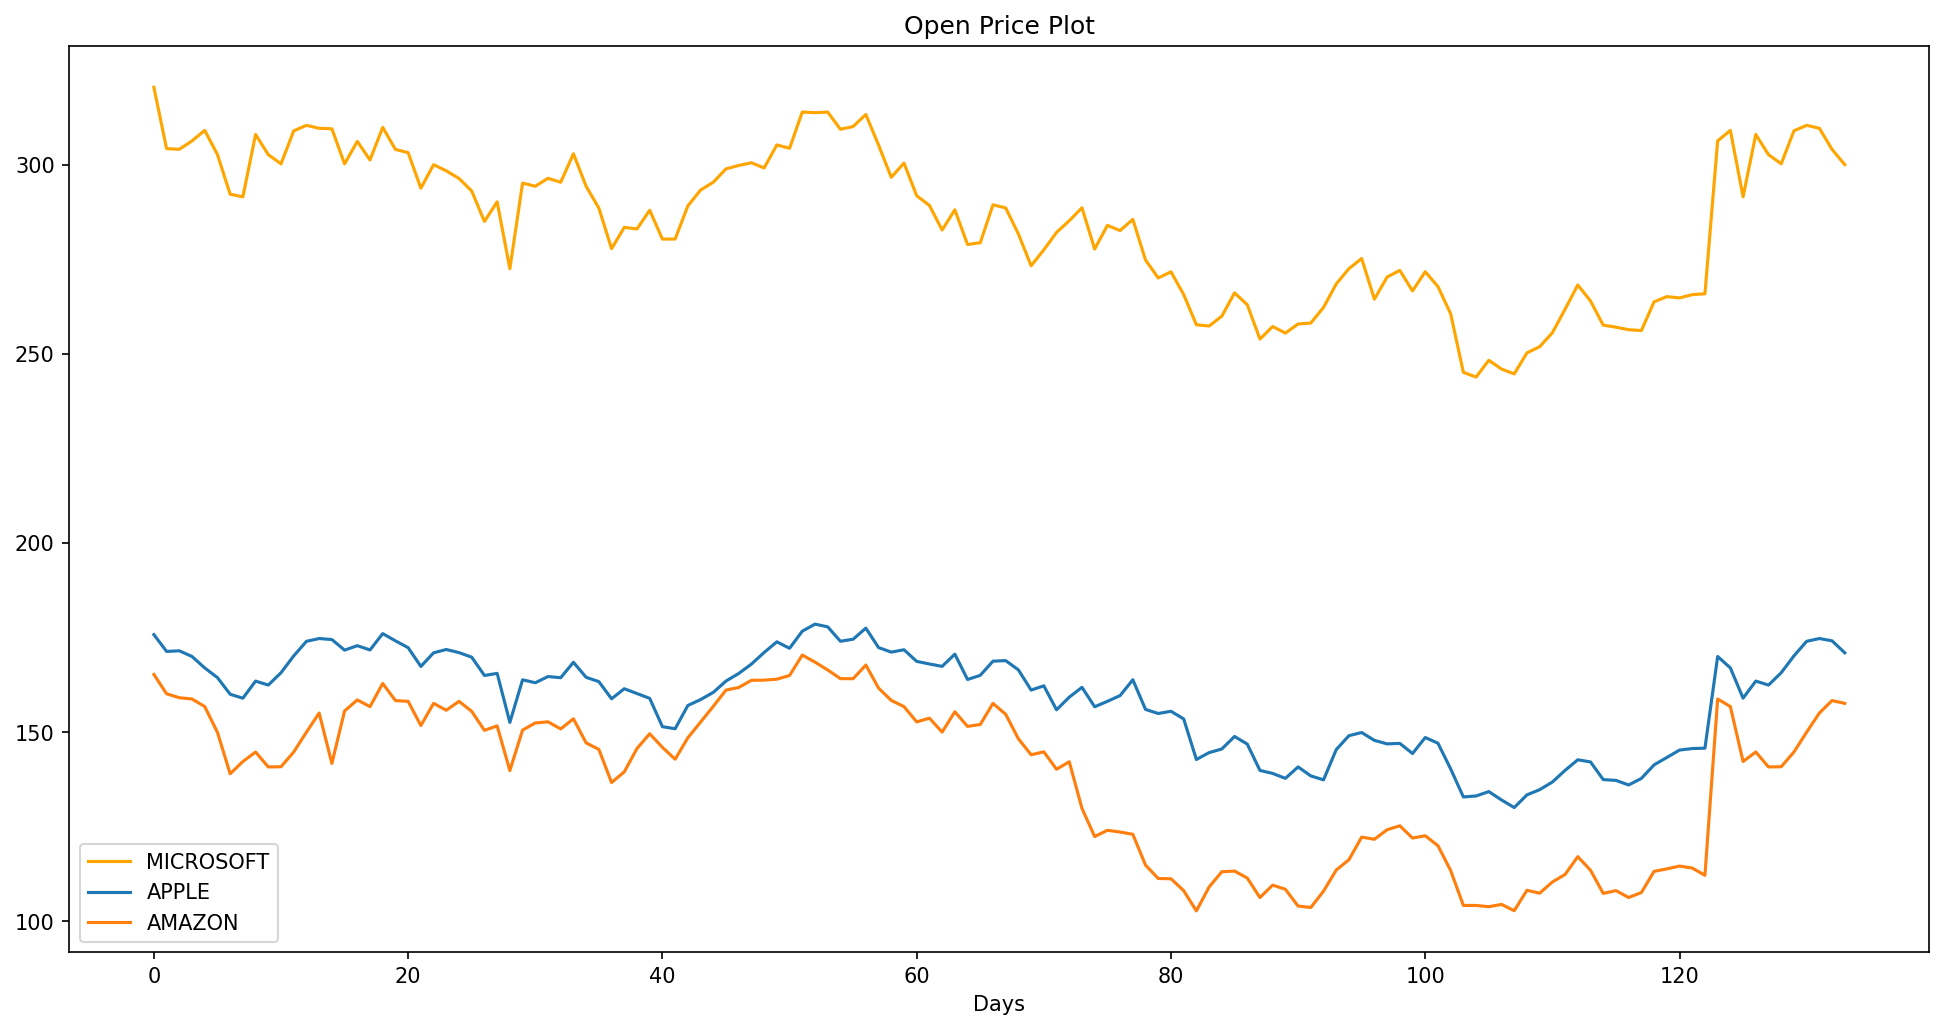

In [ ]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
x['MSFT_OPEN'].plot(label='MICROSOFT', color='orange')
x['AAPL_OPEN'].plot(label='APPLE')
x['AMZN_OPEN'].plot(label='AMAZON')
  
# adding title to the plot
plt.title('Open Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Days')
  
# adding legend to the curve
plt.legend()

In [ ]:
open_data = x['AAPL_OPEN']
high_data = x['AAPL_HIGH']
low_data = x['AAPL_LOW']
close_data = x['AAPL_CLOSE']
dates = x['Date']

fig = go.Figure(data=[go.Candlestick(x=dates, open=open_data,
                     high=high_data, 
                     low=low_data, 
                     close=close_data)])

                     
fig.show()
